<a href="https://colab.research.google.com/github/udayPatil45/-Netflix-WIDS/blob/main/Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression


Single Variable

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
df = pd.read_csv("Book1.csv")
df

,Roll no.,Marks
0,11,25
1,12,25
2,13,65
3,14,38
4,15,95
5,16,44
6,17,58
7,18,74
8,20,65


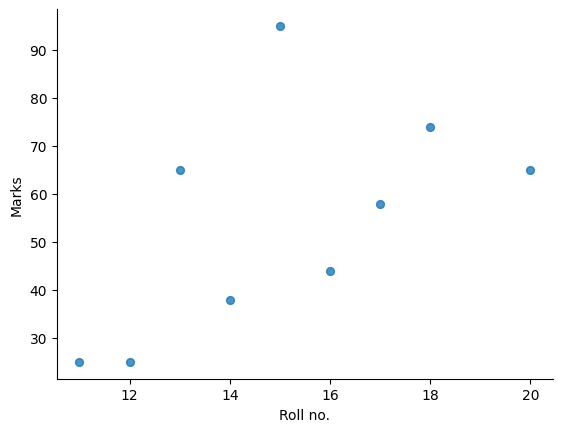

In [9]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Roll no.', y='Marks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
reg = linear_model.LinearRegression()
reg.fit(df[['Roll no.']], df.Marks)

LinearRegression()

In [11]:
reg.coef_


array([4.49516129])

In [12]:
 reg.predict([[19]])



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([71.81451613])

Plotting Graph in Matplotlib

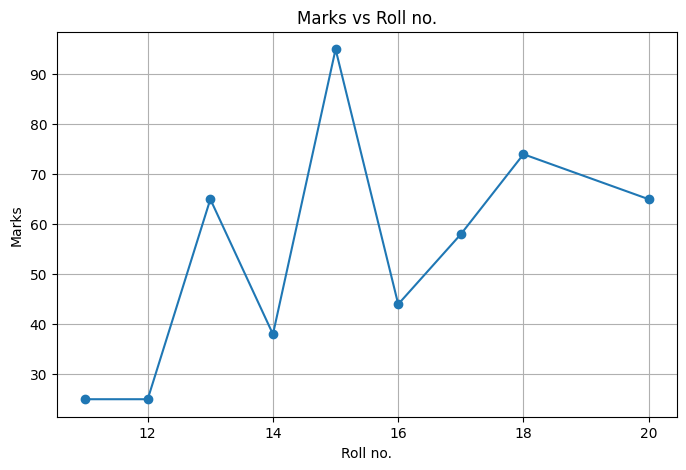

In [13]:
# Strip column names to avoid issues with spaces
df.columns = df.columns.str.strip()

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df["Roll no."], df["Marks"], marker='o', linestyle='-')
plt.xlabel("Roll no.")
plt.ylabel("Marks")
plt.title("Marks vs Roll no.")
plt.grid(True)
plt.show()


**For Multivariate and handling missing Data**

In [14]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


Data Preprocessing: Fill NA values with median value of a column

In [15]:
df.bedrooms.median()
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [16]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [17]:
reg.predict([[3000, 3, 40]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [18]:
reg.intercept_

np.float64(221323.00186540396)

In [19]:
reg.coef_


array([  112.06244194, 23388.88007794, -3231.71790863])

if we have to fill any value in the cell which is null




df.(column name) = d.(column).fillna("zero")

---




**Now doing same thing with pickle module**

In [22]:
model = linear_model.LinearRegression()
model.fit(df[['area']],df.price)

LinearRegression()

In [23]:
import pickle

In [24]:
with open('model_pickle','wb') as file:
    pickle.dump(model,file)

In [25]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

In [26]:
mp.predict([[5000]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([913240.11571842])

# Logistic Regression

In [51]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt
%matplotlib inline

FOLLOWING IS TRAINING DATA SET

In [46]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**DATA EXPLORATION AND VISUALIZATION**

In [47]:
filtered_df = df[df['left'] == 0]
print(filtered_df.head(5))

      satisfaction_level  last_evaluation  number_project  \
2000                0.58             0.74               4   
2001                0.82             0.67               2   
2002                0.45             0.69               5   
2003                0.78             0.82               5   
2004                0.49             0.60               3   

      average_montly_hours  time_spend_company  Work_accident  left  \
2000                   215                   3              0     0   
2001                   202                   3              0     0   
2002                   193                   3              0     0   
2003                   247                   3              0     0   
2004                   214                   2              0     0   

      promotion_last_5years Department salary  
2000                      0      sales    low  
2001                      0      sales    low  
2002                      0      sales    low  
2003          

In [48]:
left = df[df.left==1]
left.shape

(3571, 10)

In [49]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [53]:
# Select only numeric columns before calculating the mean
numeric_df = df.select_dtypes(include=np.number)
numeric_df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='Department'>

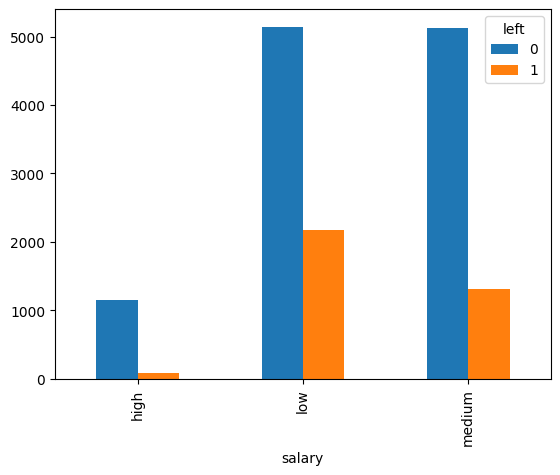

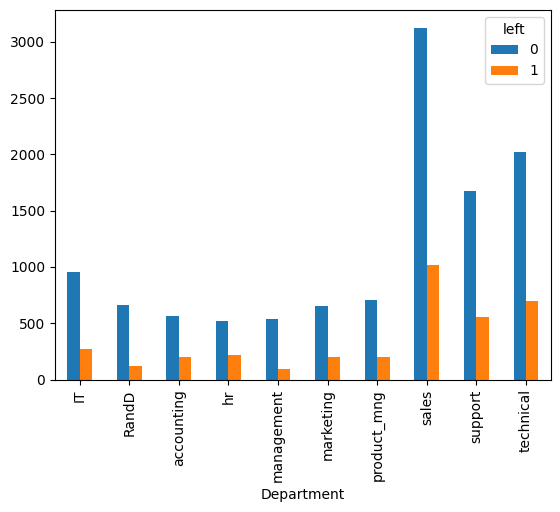

In [56]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
pd.crosstab(df.Department,df.left).plot(kind='bar')

From the data analysis so far we can conclude that we will use following variables as independant variables in our model

**Satisfaction Level**

**Average Monthly Hours**

**Promotion Last 5 Years**

**Salary**

In [55]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that.

In [58]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [59]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [60]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [61]:
y = df.left

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [64]:
model.predict(X_test)


array([0, 0, 1, ..., 0, 0, 0])

In [63]:
model.score(X_test,y_test)

0.7775238095238095

# New Section